In [0]:
# main libraries
import pandas as pd
import numpy as np
import time
import io

# visual libraries
from matplotlib import pyplot as plt
from matplotlib import gridspec

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')

from sklearn.preprocessing import normalize
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import *

In [24]:
from google.colab import files
uploaded = files.upload()

Saving PoC_dataset.csv to PoC_dataset (5).csv


In [0]:
df = pd.read_csv(io.StringIO(uploaded['PoC_dataset.csv'].decode('utf-8')))
df = df.sample(frac=1)

#drop duplicates
df = df.drop_duplicates()

X = df.values[:, 0:8].astype(float)
y = df.values[:, 8]

#Checking balanced dataset

In [26]:
All = df.shape[0]
On = df[df['target'] == 1]
Off = df[df['target'] == 0]

x = len(On)/All
y = len(Off)/All

print('On :',x*100,'%')
print('Off :',y*100,'%')

On : 52.366863905325445 %
Off : 47.633136094674555 %


Text(0,0.5,'Frequency')

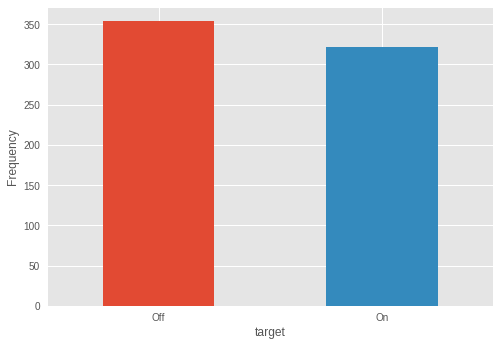

In [27]:
labels = ['Off','On']
classes = pd.value_counts(df['target'], sort = True)
classes.plot(kind = 'bar', rot=0)
#plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("target")
plt.ylabel("Frequency")

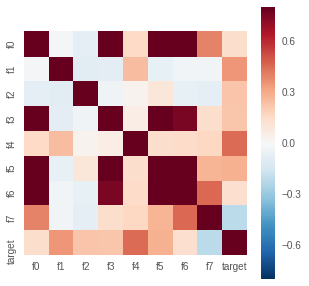

In [28]:
# heat map of correlation of features
correlation_matrix = df.corr()
fig = plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [0]:
X = df.drop(['target'], axis = 1)
y = df['target']


In [30]:
X.describe()

,f0,f1,f2,f3,f4,f5,f6,f7
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,0.042784,0.068800,0.025603,0.030503,0.889599,0.060829,0.059603,0.061995
std,0.107981,0.185388,0.100888,0.116235,0.164260,0.144070,0.142285,0.106719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000186,0.000021,0.000000,0.002836,0.838113,0.001718,0.002049,0.001838
50%,0.008933,0.000023,0.000000,0.003391,0.961604,0.016699,0.016731,0.019742
75%,0.035577,0.000191,0.000000,0.005785,1.000000,0.043116,0.045775,0.057095
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#PCA transformation
PCA (Principal Component Analysis) dimensional reduction of the feature space.

In [31]:
pca = PCA(n_components=2)
components = pca.fit_transform(X.values)
compDf = pd.DataFrame(data = components
             , columns = ['component_1', 'component_2'])
reducedDf = pd.concat([compDf, y], axis = 1)
reducedDf.describe()

,component_1,component_2,target
count,6.760000e+02,6.760000e+02,676.000000
mean,1.543801e-17,3.810233e-17,0.523669
std,2.462580e-01,1.980725e-01,0.499809
min,-2.500353e-01,-5.123633e-01,0.000000
25%,-9.516525e-02,-9.129731e-02,0.000000
50%,-5.691314e-02,-2.148988e-02,1.000000
75%,-2.854273e-02,2.168288e-03,1.000000
max,1.307965e+00,8.543644e-01,1.000000


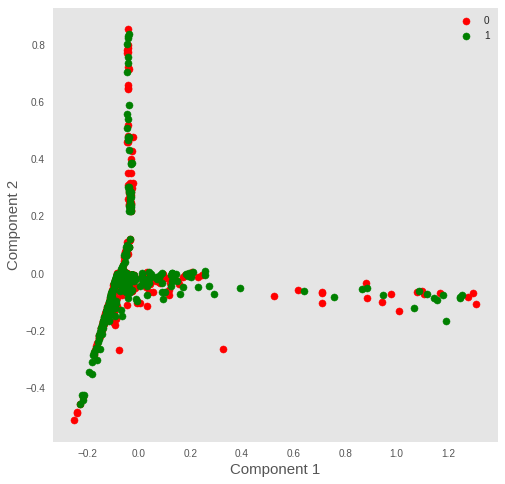

In [32]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = reducedDf['target'] == target
    ax.scatter(reducedDf.loc[indicesToKeep, 'component_1']
               , reducedDf.loc[indicesToKeep, 'component_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()